In [130]:
import pandas as pd

In [131]:
df = pd.read_csv("australia_visa_applications.csv")
df.head()

,age,gender,visa_type,documents_submitted,visa_granted,rejection_reason
0,53,Male,Visit Visa,"Passport, Travel Insurance, Invitation Letter",No,Academic documents incomplete
1,58,Female,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,NaN
2,58,Other,Student Visa,"Passport, Offer Letter, Medical Certificate, E...",No,Missing documents
3,38,Male,Visit Visa,"Passport, Bank Statement, Travel Insurance, In...",No,Missing documents
4,26,Male,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes,NaN


In [132]:
df.shape

(20000, 6)

In [133]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  20000 non-null  int64
 1   gender               20000 non-null  str  
 2   visa_type            20000 non-null  str  
 3   documents_submitted  20000 non-null  str  
 4   visa_granted         20000 non-null  str  
 5   rejection_reason     11427 non-null  str  
dtypes: int64(1), str(5)
memory usage: 937.6 KB


In [134]:
(df.isnull().sum()/df.shape[0]) * 100

age                     0.000
gender                  0.000
visa_type               0.000
documents_submitted     0.000
visa_granted            0.000
rejection_reason       42.865
dtype: float64

In [135]:
df.drop(columns='rejection_reason', inplace=True)

In [136]:
df.head()

,age,gender,visa_type,documents_submitted,visa_granted
0,53,Male,Visit Visa,"Passport, Travel Insurance, Invitation Letter",No
1,58,Female,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes
2,58,Other,Student Visa,"Passport, Offer Letter, Medical Certificate, E...",No
3,38,Male,Visit Visa,"Passport, Bank Statement, Travel Insurance, In...",No
4,26,Male,Student Visa,"Passport, Offer Letter, Bank Statement, Medica...",Yes


In [137]:
import matplotlib.pyplot as plt

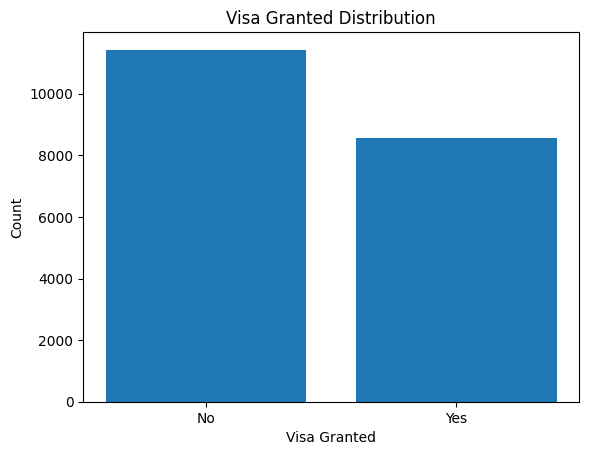

In [138]:
counts = df['visa_granted'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("Visa Granted")
plt.ylabel("Count")
plt.title("Visa Granted Distribution")
plt.show()

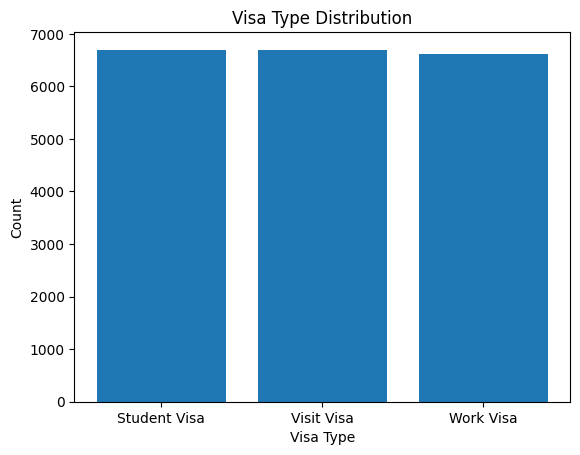

In [139]:
counts = df['visa_type'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("Visa Type")
plt.ylabel("Count")
plt.title("Visa Type Distribution")
plt.show()

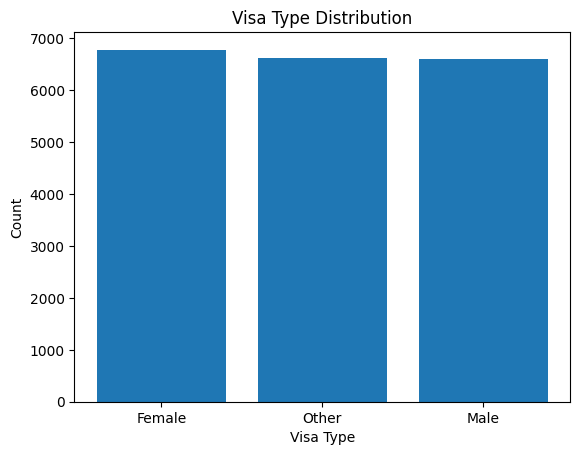

In [140]:
counts = df['gender'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("Visa Type")
plt.ylabel("Count")
plt.title("Visa Type Distribution")
plt.show()

In [141]:
df['documents_submitted'][2]

'Passport, Offer Letter, Medical Certificate, English Proficiency, Birth Certificate'

In [142]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [143]:
scaler = StandardScaler()

df['scaled_age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

In [144]:
encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['visa_type'] = encoder.fit_transform(df['visa_type'])
df['visa_granted'] = encoder.fit_transform(df['visa_granted'])

In [145]:
df.head()

,age,gender,visa_type,documents_submitted,visa_granted,scaled_age
0,53,1,1,"Passport, Travel Insurance, Invitation Letter",0,1.201615
1,58,0,0,"Passport, Offer Letter, Bank Statement, Medica...",1,1.613131
2,58,2,0,"Passport, Offer Letter, Medical Certificate, E...",0,1.613131
3,38,1,1,"Passport, Bank Statement, Travel Insurance, In...",0,-0.032934
4,26,1,0,"Passport, Offer Letter, Bank Statement, Medica...",1,-1.020572


In [146]:
df['documents_submitted'] = df['documents_submitted'].str.replace(',', ' ', regex=True).str.lower()

In [147]:
df.head()

,age,gender,visa_type,documents_submitted,visa_granted,scaled_age
0,53,1,1,passport travel insurance invitation letter,0,1.201615
1,58,0,0,passport offer letter bank statement medica...,1,1.613131
2,58,2,0,passport offer letter medical certificate e...,0,1.613131
3,38,1,1,passport bank statement travel insurance in...,0,-0.032934
4,26,1,0,passport offer letter bank statement medica...,1,-1.020572


In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

In [149]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'documents_submitted'),
        ('num', 'passthrough', ['scaled_age', 'gender', 'visa_type'])
    ]
)

In [150]:
x = preprocessor.fit_transform(df)

In [155]:
y = df['visa_granted']

In [162]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [163]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

model_selection = {
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

In [165]:
for name, model in model_selection.items():
    score = cross_val_score(model, x, y, cv=5)
    print(f"{name} Accuracy score is: {score.mean():.4f}")

K-Neighbors Classifier Accuracy score is: 0.9186
Naive Bayes Accuracy score is: 0.8305
Decision Tree Classifier Accuracy score is: 0.9268
Support Vector Machine Accuracy score is: 0.9271


In [166]:
params_model = {
    'Support Vector Machine': SVC()
}

In [167]:
params_grid = {
    'Support Vector Machine': {
        'C': [1, 10, 20, 30],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
}

In [168]:
for name in params_model:
    grid = GridSearchCV(params_model[name], params_grid[name], cv=5, return_train_score=False, scoring='accuracy')
    grid.fit(x_train, y_train)

    print('Best estimator: ', grid.best_params_)
    print('Best score: ', grid.best_score_)

Best estimator:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9277857142857144


In [170]:
svc = SVC(
      C=1,
      gamma='scale',
      kernel='rbf'
)
svc.fit(x_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [171]:
y_pred = svc.predict(x_val)

In [172]:
from sklearn.metrics import classification_report

In [173]:
print("\n", classification_report(y_val, y_pred))


               precision    recall  f1-score   support

           0       1.00      0.87      0.93      3395
           1       0.85      1.00      0.92      2605

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.94      0.93      0.93      6000



In [176]:
from sklearn.metrics import roc_auc_score

print("roc auc score: ", roc_auc_score(y_val, y_pred))

roc auc score:  0.9343151693667158
